# LendingClub Loan Prediction

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. Lending Club operates an online lending platform that enables borrowers to obtain a loan, and investors to purchase notes backed by payments made on loans.

In this project, I will use supervise machine learning method for classification problem: predict the loan will be either 'charge off' or 'fully paid'. 

# 1.Data Exploration and Clean

In [2]:
from google.colab import drive

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

import torch.nn as nn
import torch.nn.functional as F
import torch
from torch import optim, from_numpy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score



In [3]:
drive.mount('/content/drive')

df = pd.read_csv('drive/My Drive/20210401/LendingClub_Loan_Prediction/lending_club_loan_two.csv') 
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
df_info = pd.read_csv('drive/My Drive/20210401/LendingClub_Loan_Prediction/lending_club_info.csv') 
df_info.head()

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade



##full description of each fields:

LoanStatNew | Description
--- | ---
loan_amnt | The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
term | The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate | Interest Rate on the loan
installment | The monthly payment owed by the borrower if the loan originates.
grade | LC assigned loan grade
sub_grade | LC assigned loan subgrade
emp_title | The job title supplied by the Borrower when applying for the loan.*
emp_length | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
home_ownership | The home ownership status provided by the borrower during registration¬†or obtained from the credit report.¬†Our values are: RENT, OWN, MORTGAGE, OTHER
annual_inc | The self-reported annual income provided by the borrower during registration.
verification_status | Indicates if income was verified by LC, not verified, or if the income source was verified
issue_d | The month which the loan was funded
loan_status | Current status of the loan
purpose | A category provided by the borrower for the loan request. 
title | The loan title provided by the borrower
zip_code | The first 3 numbers of the zip code provided by the borrower in the loan application.
addr_state | The state provided by the borrower in the loan application
dti | A ratio calculated using the borrower‚Äôs total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower‚Äôs self-reported monthly income.
earliest_cr_line | The month the borrower's earliest reported credit line was opened
open_acc | The number of open credit lines in the borrower's credit file.
pub_rec | Number of derogatory public records
revol_bal | Total credit revolving balance
revol_util | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
total_acc | The total number of credit lines currently in the borrower's credit file
initial_list_status | The initial listing status of the loan. Possible values are‚
application_type | Indicates whether the loan is an individual application or a joint application with two co-borrowers
mort_acc | Number of mortgage accounts.
pub_rec_bankruptcies | Number of public record bankruptcies




In [5]:
print(df.shape)

(396030, 27)


In [6]:
print(df.columns.values)

['loan_amnt' 'term' 'int_rate' 'installment' 'grade' 'sub_grade'
 'emp_title' 'emp_length' 'home_ownership' 'annual_inc'
 'verification_status' 'issue_d' 'loan_status' 'purpose' 'title' 'dti'
 'earliest_cr_line' 'open_acc' 'pub_rec' 'revol_bal' 'revol_util'
 'total_acc' 'initial_list_status' 'application_type' 'mort_acc'
 'pub_rec_bankruptcies' 'address']


In [7]:
print(df.describe())

           loan_amnt       int_rate    installment    annual_inc  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean    14113.888089      13.639400     431.849698  7.420318e+04   
std      8357.441341       4.472157     250.727790  6.163762e+04   
min       500.000000       5.320000      16.080000  0.000000e+00   
25%      8000.000000      10.490000     250.330000  4.500000e+04   
50%     12000.000000      13.330000     375.430000  6.400000e+04   
75%     20000.000000      16.490000     567.300000  9.000000e+04   
max     40000.000000      30.990000    1533.810000  8.706582e+06   

                 dti       open_acc        pub_rec     revol_bal  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean       17.379514      11.311153       0.178191  1.584454e+04   
std        18.019092       5.137649       0.530671  2.059184e+04   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%        11.280000       8.000000       0.000

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [9]:
#Distribution of the Class column
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

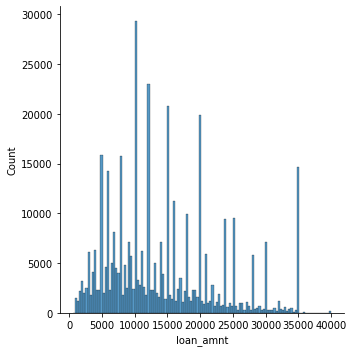

In [10]:
sns.displot(df['loan_amnt'])

In [11]:
df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [12]:
df_col_counts = df.nunique().to_frame()
df_col_counts.columns = ['counts']
df_col_counts = df_col_counts.loc[df_col_counts['counts'] < 60]
#df_col_counts
categorical_features = df_col_counts.index.to_list()


In [13]:
# check correlation
corr = df.corr()
corr

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


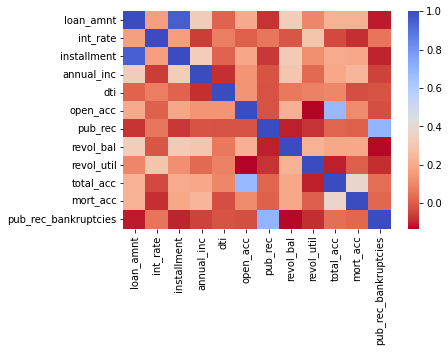

In [14]:
sns.heatmap(corr,cmap='coolwarm_r')

Here is the question that came on my mind. Is there a relationship between really expensive loans and not being able to pay them off or very low amount and then fully paying those off?

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Fully Paid v.s. Charged Off: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-3.772e+01


(<matplotlib.axes._subplots.AxesSubplot at 0x7fb1ee7d8c90>,
 [<statannot.StatResult.StatResult at 0x7fb1ee787810>])

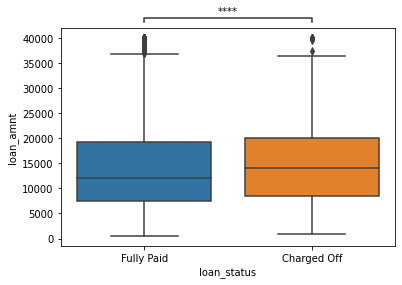

In [15]:
!pip install statannot
from statannot import add_stat_annotation
ax = sns.boxplot(x='loan_status',y='loan_amnt',data=df)
add_stat_annotation(ax, data=df, x='loan_status', y='loan_amnt',
                    box_pairs=[('Fully Paid', 'Charged Off')],
                    test='t-test_ind', text_format='star', loc='outside', verbose=2)

In [16]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [17]:
sorted(df.grade.unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [18]:
sorted(df.sub_grade.unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

In [19]:
categorical_features

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'pub_rec',
 'initial_list_status',
 'application_type',
 'mort_acc',
 'pub_rec_bankruptcies']

[Text(0, 0, 'debt_consolidation'),
 Text(0, 0, 'credit_card'),
 Text(0, 0, 'home_improvement'),
 Text(0, 0, 'other'),
 Text(0, 0, 'major_purchase'),
 Text(0, 0, 'small_business'),
 Text(0, 0, 'car'),
 Text(0, 0, 'medical'),
 Text(0, 0, 'moving'),
 Text(0, 0, 'vacation'),
 Text(0, 0, 'house'),
 Text(0, 0, 'wedding'),
 Text(0, 0, 'renewable_energy'),
 Text(0, 0, 'educational')]

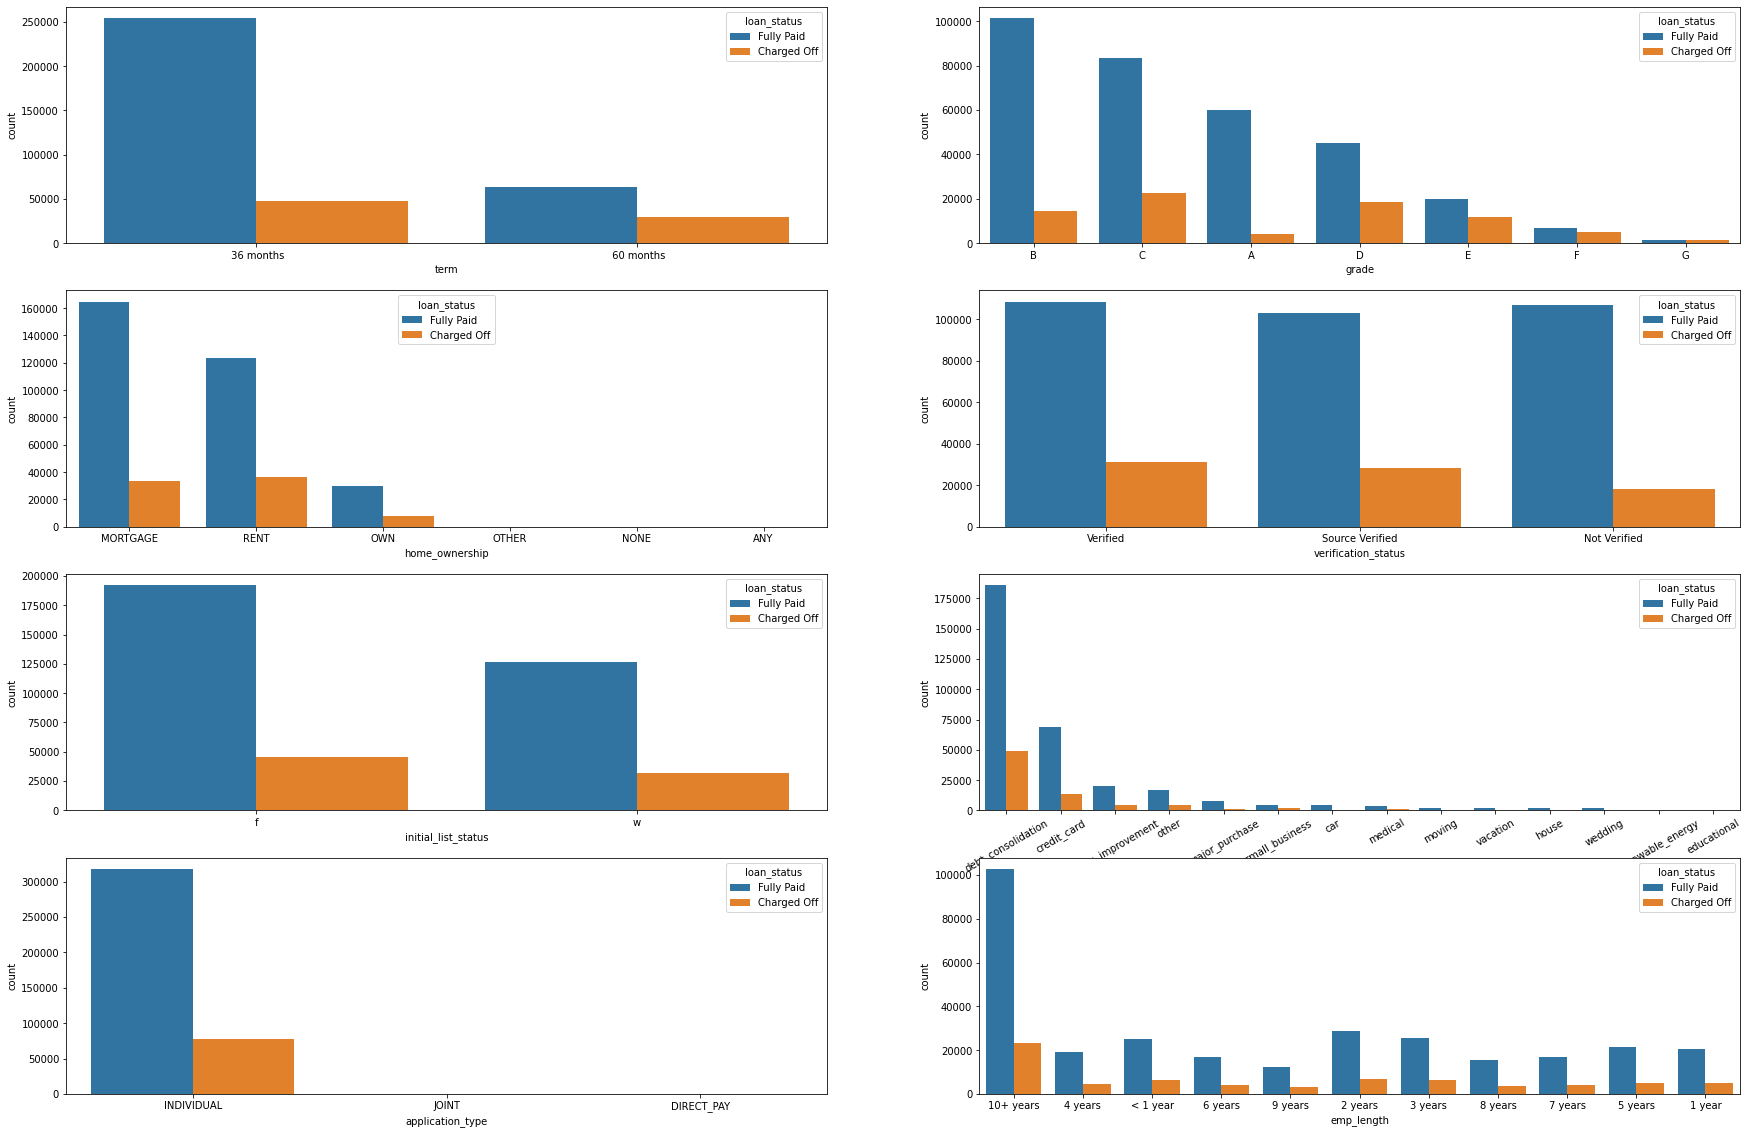

In [20]:
# understand categorical feature

__,axss = plt.subplots(4,2, figsize=[30,20])
#_,axss = plt.subplots(3,2, figsize=[30,20])
# sns.barplot(x='term', y='loan_status', data=df, ax=axss[0][0], estimator=np.mean, ci=95, capsize=.2)
# sns.barplot(x='grade', y='loan_status', data=df, ax=axss[0][1], estimator=np.mean, ci=95, capsize=.2)
# sns.barplot(x='home_ownership', y='loan_status', data=df, ax=axss[1][0], estimator=np.mean, ci=95, capsize=.2)
# sns.barplot(x='verification_status', y='loan_status', data=df, ax=axss[1][1], estimator=np.mean, ci=95, capsize=.2)

sns.countplot(x='term', hue='loan_status', data=df, ax=axss[0][0], order = df['term'].value_counts().index)
sns.countplot(x='grade', hue='loan_status', data=df, ax=axss[0][1], order = df['grade'].value_counts().index)
sns.countplot(x='home_ownership', hue='loan_status', data=df, ax=axss[1][0], order = df['home_ownership'].value_counts().index)
sns.countplot(x='verification_status', hue='loan_status', data=df, ax=axss[1][1], order = df['verification_status'].value_counts().index)
sns.countplot(x='initial_list_status', hue='loan_status', data=df, ax=axss[2][0], order = df['initial_list_status'].value_counts().index)
sns.countplot(x='purpose', hue='loan_status', data=df, ax=axss[2][1], order = df['purpose'].value_counts().index)
sns.countplot(x='application_type', hue='loan_status', data=df, ax=axss[3][0], order = df['application_type'].value_counts().index)
sns.countplot(x='emp_length', hue='loan_status', data=df, ax=axss[3][1])
axss[2][1].set_xticklabels(axss[2][1].get_xticklabels(),rotation = 30)

In [21]:
#df['application_type'].value_counts()

In [22]:
# check the ratio of 'charge off' in grade
df4 = df[['grade','loan_status']].value_counts().reset_index()
df4.columns = ['grade','loan_status','Counts']
df6 = df4.pivot(index='grade', columns='loan_status')
cols = ['Charged Off','Fully Paid']
df6.columns = cols
df6['Ratio'] = df6['Charged Off']/(df6['Charged Off'] + df6['Fully Paid']) * 100
df6

,Charged Off,Fully Paid,Ratio
grade,,,
A,4036,60151,6.287878
B,14587,101431,12.573049
C,22449,83538,21.180900
D,18338,45186,28.867829
E,11765,19723,37.363440
F,5037,6735,42.787971
G,1461,1593,47.838900


In [23]:
# check the ratio of 'charge off' in sub-grade
df4 = df[['sub_grade','loan_status']].value_counts().reset_index()
df4.columns = ['sub_grade','loan_status','Counts']
df6 = df4.pivot(index='sub_grade', columns='loan_status')
cols = ['Charged Off','Fully Paid']
df6.columns = cols
df6['Ratio'] = df6['Charged Off']/(df6['Charged Off'] + df6['Fully Paid']) * 100
df6

,Charged Off,Fully Paid,Ratio
sub_grade,,,
A1,279,9450,2.867715
A2,461,9106,4.818647
A3,614,9962,5.805598
A4,1109,14680,7.023877
A5,1573,16953,8.490770
B1,1891,17291,9.858200
B2,2441,20054,10.851300
B3,3288,23367,12.335397
B4,3543,22058,13.839303


In [24]:
# change predict feature to numerical
#class_mapping = {'Fully Paid' : 0, 'Charged Off' : 1}
class_mapping = {'Fully Paid' : 1, 'Charged Off' : 0}
df['loan_status'] = df['loan_status'].map(class_mapping)
df['loan_status'].value_counts()

1    318357
0     77673
Name: loan_status, dtype: int64

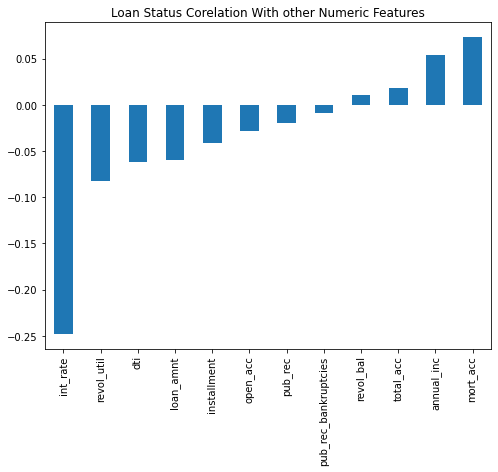

In [25]:
plt.figure(figsize=(8,6))
df.corr()['loan_status'].sort_values().iloc[:-1].plot(kind='bar')
plt.title('Loan Status Corelation With other Numeric Features')
plt.show()

# 2. Feature Engineering 

## Missing Value

In [26]:
#null checking
df.isna().sum().sort_values(ascending=False)

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1755
pub_rec_bankruptcies      535
revol_util                276
loan_amnt                   0
dti                         0
application_type            0
initial_list_status         0
total_acc                   0
revol_bal                   0
pub_rec                     0
open_acc                    0
earliest_cr_line            0
purpose                     0
term                        0
loan_status                 0
issue_d                     0
verification_status         0
annual_inc                  0
home_ownership              0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
address                     0
dtype: int64

In [27]:
df.isna().sum().sort_values(ascending=False)/len(df)*100

mort_acc                9.543469
emp_title               5.789208
emp_length              4.621115
title                   0.443148
pub_rec_bankruptcies    0.135091
revol_util              0.069692
loan_amnt               0.000000
dti                     0.000000
application_type        0.000000
initial_list_status     0.000000
total_acc               0.000000
revol_bal               0.000000
pub_rec                 0.000000
open_acc                0.000000
earliest_cr_line        0.000000
purpose                 0.000000
term                    0.000000
loan_status             0.000000
issue_d                 0.000000
verification_status     0.000000
annual_inc              0.000000
home_ownership          0.000000
sub_grade               0.000000
grade                   0.000000
installment             0.000000
int_rate                0.000000
address                 0.000000
dtype: float64

Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:

In [28]:
df['mort_acc'].nunique()

33

In [29]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [30]:
df['mort_acc']=df['mort_acc'].fillna(df['mort_acc'].mean())

In [31]:
df['emp_title'].nunique()

173105

In [32]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [33]:
df.drop(columns='emp_title',axis=1,inplace=True)

In [34]:
# check the ratio of 'charge off' in emp_length
df4 = df[['emp_length','loan_status']].value_counts().reset_index()
df4.columns = ['emp_length','loan_status','Counts']
df6 = df4.pivot(index='emp_length', columns='loan_status')
cols = ['Charged Off','Fully Paid']
df6.columns = cols
df6['Ratio'] = df6['Charged Off']/(df6['Charged Off'] + df6['Fully Paid']) * 100
df6

,Charged Off,Fully Paid,Ratio
emp_length,,,
1 year,5154,20728,19.913453
10+ years,23215,102826,18.418610
2 years,6924,28903,19.326206
3 years,6182,25483,19.523133
4 years,4608,19344,19.238477
5 years,5092,21403,19.218721
6 years,3943,16898,18.919438
7 years,4055,16764,19.477400
8 years,3829,15339,19.976002


Charge off rates are extremely similar across all employment lengths so we will drop the emp_length column.

In [35]:
df.drop(columns='emp_length',axis=1,inplace=True)

In [36]:
df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [37]:
df['title'].value_counts()

Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

In [38]:
df[['title','purpose']].head(10)

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
5,Debt consolidation,debt_consolidation
6,Home improvement,home_improvement
7,No More Credit Cards,credit_card
8,Debt consolidation,debt_consolidation
9,Debt Consolidation,debt_consolidation


The title column is simply a string subcategory/description of the purpose column. So we can use pirpose column and drop the title column.

In [39]:
df.drop(columns='title',axis=1,inplace=True)

revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. So we will trop the rows that has missing values for these two columns

In [40]:
df.dropna(inplace=True)

In [41]:
df.isna().sum().sort_values(ascending=False)

loan_amnt               0
term                    0
pub_rec_bankruptcies    0
mort_acc                0
application_type        0
initial_list_status     0
total_acc               0
revol_util              0
revol_bal               0
pub_rec                 0
open_acc                0
earliest_cr_line        0
dti                     0
purpose                 0
loan_status             0
issue_d                 0
verification_status     0
annual_inc              0
home_ownership          0
sub_grade               0
grade                   0
installment             0
int_rate                0
address                 0
dtype: int64

## Categorical Features

In [42]:
df['addr_state'] = df['address'].str.slice(-8, -6)
df['Postal_Code'] = df['address'].str[-5:]
df.loc[0]

loan_amnt                                                      10000.0
term                                                         36 months
int_rate                                                         11.44
installment                                                     329.48
grade                                                                B
sub_grade                                                           B4
home_ownership                                                    RENT
annual_inc                                                    117000.0
verification_status                                       Not Verified
issue_d                                                       Jan-2015
loan_status                                                          1
purpose                                                       vacation
dti                                                              26.24
earliest_cr_line                                              Jun-1990
open_a

In [43]:
# total loan amount issued by State
df_location = df.groupby('addr_state').sum().reset_index()
df_location = df_location.filter(['addr_state', 'loan_amnt'], axis = 1)
# delete military state code
df_location = df_location[df_location['addr_state'].isin(['AA','AE','AP']) == False]
#df_location

In [44]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=df_location['addr_state'], # Spatial coordinates
    z = df_location['loan_amnt'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in locations
    colorscale = 'Reds',
    colorbar_title = 'USD',
))

fig.update_layout(
    title_text = 'Total amount issued by State',
    geo_scope='usa', # limited map scope to USA
)

fig.show()

In [45]:
df.select_dtypes(include=['object']).nunique()

term                        2
grade                       7
sub_grade                  35
home_ownership              6
verification_status         3
issue_d                   112
purpose                    14
earliest_cr_line          684
initial_list_status         2
application_type            3
address                392898
addr_state                 54
Postal_Code                10
dtype: int64

In [46]:
# term
dummy_term=pd.get_dummies(df.term) 
df = pd.concat([df.drop('term',axis=1),dummy_term],axis=1) 
# grade
df.drop(columns='grade',axis=1,inplace=True)

# sub_grade
dummy_sub_grades=pd.get_dummies(df.sub_grade) 
df = pd.concat([df.drop('sub_grade',axis=1),dummy_sub_grades],axis=1) 

We already know grade is part of sub_grade, so we will just drop the grade feature.

In [47]:
#home_ownership
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

We only have 29 and 3 people in none and any catagories , so we will just add them to other catagorie so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER.And convert these 4 catagoires into dummmy variable.

In [48]:
df['home_ownership']=df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [49]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [50]:
dummy_home_ownership=pd.get_dummies(df['home_ownership']) # creating dummies variable and droping first column.
df = pd.concat([df.drop('home_ownership',axis=1),dummy_home_ownership],axis=1) # we are droping home_ownership column and concatingg dummy_home to our original df.

In [51]:
# drop state
df.drop(columns='addr_state',axis=1,inplace=True)

In [52]:
# zip code
dummy_Postal_Code=pd.get_dummies(df.Postal_Code) 
df = pd.concat([df.drop('Postal_Code',axis=1),dummy_Postal_Code],axis=1) 

In [53]:
# drop address
df.drop(columns='address',axis=1,inplace=True)

This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, so we will drop this feature.

In [54]:
df.drop(columns='issue_d',axis=1,inplace=True)

In [55]:
df['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

This appears to be a historical time stamp feature. WE WILL Extract the year from this feature using a .apply function, then convert it to a numeric feature And set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line column.

In [56]:
# df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
# df['earliest_cr_line'].head()
df['earliest_cr_year']=df.earliest_cr_line.apply(lambda year: year[-4:])
df['earliest_cr_year']=df.earliest_cr_year.astype('int')
df.drop(columns='earliest_cr_line',axis=1,inplace=True)

In [57]:
df[['earliest_cr_year']].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

,earliest_cr_year
count,395219.000000
mean,1997.861636
std,7.199028
min,1944.000000
10%,1988.000000
20%,1993.000000
30%,1995.000000
40%,1998.000000
50%,1999.000000
60%,2001.000000


In [58]:
df['earliest_cr_year'].value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: earliest_cr_year, Length: 65, dtype: int64

In [59]:
# Convert 'earliest_cr_year' into dummy variables
bin_year = [1944, 1988, 1993, 1995, 1998, 1999, 2001, 2002, 2004, 2006, 2013]
year_range = ['1944-1988', '1988-1993', '1993-1995', '1995-1998','1998-1999','1999-2001','2001-2002','2002-2004',
              '2004-2006','2006-2013']
year_bin = pd.cut(df['earliest_cr_year'], bin_year, labels=year_range)
dummy_year = pd.get_dummies(year_bin)
df = pd.concat([df.drop('earliest_cr_year',axis=1),dummy_year],axis=1) 

In [60]:
df.select_dtypes(include=['object']).columns

Index(['verification_status', 'purpose', 'initial_list_status',
       'application_type'],
      dtype='object')

In [61]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [62]:
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [63]:
df['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [64]:
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

In [65]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']])
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [66]:
df.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', ' 36 months', ' 60 months', 'A1',
       'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3',
       'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5',
       'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'MORTGAGE',
       'OTHER', 'OWN', 'RENT', '00813', '05113', '11650', '22690', '29597',
       '30723', '48052', '70466', '86630', '93700', '1944-1988', '1988-1993',
       '1993-1995', '1995-1998', '1998-1999', '1999-2001', '2001-2002',
       '2002-2004', '2004-2006', '2006-2013',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_DIRECT_PAY', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_f',
       'initi

In [67]:
#df.head()

In [68]:
# final check
df.shape

(395219, 96)

## Train Test Split

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X=np.array(df.drop(columns='loan_status',axis=1))
y=np.array(df['loan_status'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify = y)

## Normalizing the Data

In [70]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 3. Model Training  

## RandomForest/ Kneighbors/ LogisticRegression/XGBoost

In [165]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from xgboost import XGBClassifier

Classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    #SVC(),
    RandomForestClassifier(),
    XGBClassifier()
    ]


# # Logistic Regression
# classifier_logistic = LogisticRegression()

# # K Nearest Neighbors
# classifier_KNN = KNeighborsClassifier()

# # Random Forest
# classifier_RF = RandomForestClassifier()

In [166]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=2)

results = {}

for Classifier in Classifiers:
    pipe = Pipeline(steps=[
                           ('Classifier', Classifier)
                          ])
    cv_results = cross_val_score(pipe, X_train, y_train, cv=kfold, n_jobs=-1, scoring='f1')
    results[Classifier.__class__.__name__] = cv_results

results = pd.DataFrame(results).rename_axis('K').reset_index()
results = results.melt('K', var_name='Model', value_name='Score')

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



In [167]:
#results.columns

In [168]:
import altair as alt

bars = alt.Chart(results).mark_bar().encode(
    x=alt.X('mean(Score):Q', title='Mean F1 Score',scale=alt.Scale(domain=(0.9, 1.0))),
    y=alt.Y('Model:N', sort=alt.EncodingSortField(op='mean', field='Score', order='descending'))
)

error_bars = bars.mark_errorbar(extent='ci').encode(
    x=alt.X('Score:Q', title='Mean Score')
)

bars + error_bars

alt.LayerChart(...)

## Builting Neural Network Using Pytorch

In [71]:
# convert a df to tensor to be used in pytorch
def df_to_tensor(df):
    return torch.from_numpy(df).float()

In [72]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [73]:
# class Model(nn.Module):
#     def __init__(self, no_of_num, hidden_layers, output_size, lin_layer_dropouts):
#         super().__init__()
#         self.hidden_layers = hidden_layers

#         # In layer
#         self.in_layer = nn.Linear(no_of_num, hidden_layers[0])
        
#         # hidden layers
#         self.hidden_layers = nn.ModuleList([nn.Linear(hidden_layers[i], hidden_layers[i+1]) for i in range(len(hidden_layers)-1)])

#         # Bn Layers
#         self.bn_layers = nn.ModuleList([nn.BatchNorm1d(size) for size in hidden_layers])
        
#         # Dropout Layers
#         self.dropout_layers = nn.ModuleList([nn.Dropout(size) for size in lin_layer_dropouts])
        
#         # Output layer
#         self.output_layer = nn.Linear(hidden_layers[-1], output_size)
        
#     def forward(self, X):
#         X = self.dropout_layers[0](X)
#         X = F.relu(self.in_layer(X))
#         X = self.bn_layers[0](X)
#         X = self.dropout_layers[1](X)
            
#         for i, _ in enumerate(self.hidden_layers):
#             X = F.relu(self.hidden_layers[i](X))
#             X = self.bn_layers[i+1](X)
#             X = self.dropout_layers[i+2](X)
#         y_pred = self.output_layer(X)
#         return y_pred



In [74]:
# X_train_1 = df_to_tensor(X_train).squeeze().to(device)
# X_test_1 = df_to_tensor(X_test).squeeze().to(device)
# y_train_1 = df_to_tensor(y_train).squeeze().to(device)
# y_test_1 = df_to_tensor(y_test).squeeze().to(device)

# # our model
# model = Model(no_of_num=X_train_1.shape[1],
#                       hidden_layers=[400,500,750,500,400,128,8],
#                       output_size=1,
#                       lin_layer_dropouts=[0.8, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.3])
# model.to(device)

# # Construct our loss function and an Optimizer. The call to model.parameters()
# # in the SGD constructor will contain the learnable parameters of the two
# # nn.Linear modules which are members of the model.

# # criterion = nn.BCEWithLogitsLoss()
# weightss = torch.zeros_like(torch.from_numpy(y_train)).float().to(device)
# weightss = torch.fill_(weightss, 1.00)
# weightss[y_train == 0] = 4.099
# # weightss = torch.randn(264796).to(device)
# criterion = nn.BCELoss(weight=weightss)

# optimizer = optim.Adam(model.parameters(), lr=0.005)

# # print(model)
# # print(X_train_1.shape)

In [124]:
# a simple neural network 
class Model(nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear module
        """
        super(Model, self).__init__()
        self.l1 = nn.Linear(95, 64)
        self.dropout1 = nn.Dropout(0.10)
        self.l2 = nn.Linear(64, 32)
        self.dropout2 = nn.Dropout(0.05)
        self.l3 = nn.Linear(32, 16)
        self.dropout3 = nn.Dropout(0.05)
        self.l4 = nn.Linear(16, 1)

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        out1 = self.dropout1(self.sigmoid(self.l1(x)))
        out2 = self.dropout2(self.sigmoid(self.l2(out1)))
        out3 = self.dropout3(self.sigmoid(self.l3(out2)))
        y_pred = self.sigmoid(self.l4(out3))
        return y_pred

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # PyTorch v0.4.0
# X_train_1 = from_numpy(X_train.astype(np.float32)).squeeze().to(device)
# X_test_1 = from_numpy(X_test.astype(np.float32)).squeeze().to(device)
# y_train_1 = from_numpy(y_train.astype(np.float32)).squeeze().to(device)
# y_test_1 = from_numpy(y_test.astype(np.float32)).squeeze().to(device)

X_train_1 = df_to_tensor(X_train).squeeze().to(device)
X_test_1 = df_to_tensor(X_test).squeeze().to(device)
y_train_1 = df_to_tensor(y_train).squeeze().to(device)
y_test_1 = df_to_tensor(y_test).squeeze().to(device)

# our model
model = Model()
model.to(device)

# classes = [0,1]
# weightss = compute_class_weight(class_weight='balanced',classes = classes, y = y_train.reshape(-1))
# # # print(weightss)
# weightss = df_to_tensor(weightss)
weightss = torch.zeros_like(torch.from_numpy(y_train)).float().to(device)
weightss = torch.fill_(weightss, 1.00)
weightss[y_train == 0] = 4.30
# weightss = torch.randn(264796).to(device)
criterion = nn.BCELoss(weight=weightss)
#criterion = nn.CrossEntropyLoss()

# criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.007)

In [142]:
model.train()
# Training loop
for epoch in range(30000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(X_train_1)
    #y_pred = y_pred.unsqueeze(1)

    # Compute and print loss
    loss = criterion(y_pred.flatten(), y_train_1)
    # print(y_pred.flatten())
    # print(y_train_1)
    
    #print(f'Epoch: {epoch + 1}/30000 | Loss: {loss.item():.4f}')

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# 4. Model evaluation

In [143]:
import itertools

y_pred_list = []
model.eval()
#Since we don't need model to back propagate the gradients in test set we use torch.no_grad()
# reduces memory usage and speeds up computation
with torch.no_grad():
  prediction = model(X_test_1)
  y_pred_tag = torch.round(prediction)
  y_pred_list.append(y_pred_tag.cpu().detach().numpy())

#Takes arrays and makes them list of list for each batch        
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
#flattens the lists in sequence
ytest_pred = list(itertools.chain.from_iterable(y_pred_list))



In [144]:
y_true_test = y_test.ravel()
conf_matrix = confusion_matrix(y_true_test ,ytest_pred)
print("Confusion Matrix of the Test Set")
print("-----------")
print(conf_matrix)
print("Precision of the MLP :\t"+str(precision_score(y_true_test,ytest_pred)))
print("Recall of the MLP    :\t"+str(recall_score(y_true_test,ytest_pred)))
print("F1 Score of the Model :\t"+str(f1_score(y_true_test,ytest_pred)))

Confusion Matrix of the Test Set
-----------
[[12410  3095]
 [13727 49812]]
Precision of the MLP :	0.9415011246148903
Recall of the MLP    :	0.7839594579706952
F1 Score of the Model :	0.8555381893753329


# Conclusion
Here, F1 score is used for model evaluation. 

In several machine learning models, RandomForest and LogisticRegression and XGBoost have pretty good F1 scores(~0.935).  

In order to avoid local minimun in neural network training process, the learning rate and weight for different class need to be tuned properly to get higher F1 scores.  

In [145]:
# prediction=model(X_test_1)

In [146]:
# temp = prediction.detach().numpy()


# unique, counts = np.unique(temp, return_counts=True)
# print(np.asarray((unique, counts)).T)

In [147]:
# print(confusion_matrix(y_test, prediction.detach().numpy().astype(int)))

In [148]:
# accuracy_score(y_test, prediction.detach().numpy().astype(int))

In [149]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense,Dropout
# from tensorflow.keras.models import save_model,load_model

In [150]:
# # CODE HERE
# model = Sequential()

# # Choose whatever number of layers/neurons you want.

# # https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# # Remember to compile()

In [151]:
# model.add(Dense(78,activation="relu"))
# model.add(Dropout(0.2))

# model.add(Dense(39,activation="relu"))
# model.add(Dropout(0.2))
          
# model.add(Dense(19,activation="relu"))
# model.add(Dropout(0.2))
          
# model.add(Dense(1,activation="sigmoid"))

# model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [152]:
# model.fit(X_train,y_train,
#           batch_size=256,
#           verbose=1,
#           epochs=25,
#           validation_data=(X_test,y_test)  
#          )

In [153]:
# history=pd.DataFrame(model.history.history)
# history.head()

In [154]:
# history[["loss","val_loss"]].plot()

In [155]:
# prediction=model.predict_classes(X_test)

In [156]:
# print(confusion_matrix(y_test,prediction))

In [157]:
# x = torch.randn(20, 5) #The input is expected to contain raw, unnormalized scores for each class.

# y = torch.randint(0, 5, (20,))

# print(y.numpy()) #Counter({1: 5, 4: 5, 1: 4, 0: 4, 3: 2})

In [158]:
# class_weights=class_weight.compute_class_weight('balanced',np.unique(y),y.numpy())
# class_weights=torch.tensor(class_weights,dtype=torch.float)

# print(class_weights) #([1.0000, 1.0000, 4.0000, 1.0000, 0.5714])